In [2]:
import tensorflow as tf

In [47]:
#!pip install matplotlib

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

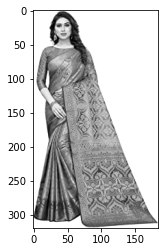

In [13]:
DATADIR="C:/docs"
CATEGORIES=["Sarees","Jeans","Trousers"]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
        

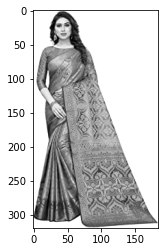

In [14]:
#To resize the data to put all images to same size
IMG_SIZE=50

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(img_array,cmap="gray")
plt.show()

In [51]:
#Create training data

In [62]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            
            except Exception as e:
                pass
        
create_training_data()
        

In [16]:
print(len(training_data))

5999


In [54]:
#Dataset is balanced

In [55]:
#Still lets shuffle the data for better analysis

In [17]:
import random
random.shuffle(training_data)

In [18]:
for sample in training_data[:10]:
    print(sample[1])


2
2
2
2
0
2
0
0
0
1


In [19]:
X=[]
y=[]

In [20]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [60]:
#To save the data
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten , Conv2D,MaxPooling2D

In [33]:
X=X/255.0

In [43]:
y=np.array(y)

In [47]:
model=Sequential()

In [48]:


model.add(  Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [49]:
model.add(  Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [51]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [52]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])


In [44]:
model.fit(X,y, batch_size=32,validation_split=0.1)

169/169 [==============================] - 80s 441ms/step - loss: -55757.6094 - accuracy: 0.3697 - val_loss: -402408.0312 - val_accuracy: 0.3767


In [53]:
#With few epochs

model.fit(X,y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
169/169 [==============================] - 64s 359ms/step - loss: 0.0000e+00 - accuracy: 0.4831 - val_loss: 0.0000e+00 - val_accuracy: 0.4433
Epoch 2/10
169/169 [==============================] - 55s 328ms/step - loss: 0.0000e+00 - accuracy: 0.5038 - val_loss: 0.0000e+00 - val_accuracy: 0.4750
Epoch 3/10
169/169 [==============================] - 55s 327ms/step - loss: 0.0000e+00 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 0.4983
Epoch 4/10
169/169 [==============================] - 57s 335ms/step - loss: 0.0000e+00 - accuracy: 0.5077 - val_loss: 0.0000e+00 - val_accuracy: 0.5117
Epoch 5/10
169/169 [==============================] - 56s 328ms/step - loss: 0.0000e+00 - accuracy: 0.5162 - val_loss: 0.0000e+00 - val_accuracy: 0.4983
Epoch 6/10
169/169 [==============================] - 57s 335ms/step - loss: 0.0000e+00 - accuracy: 0.5288 - val_loss: 0.0000e+00 - val_accuracy: 0.4750
Epoch 7/10
169/169 [==============================] - 57s 338ms/step - loss: 0.000

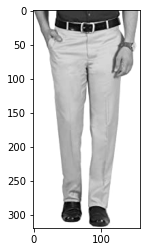

In [57]:
DATADIR1="C:\downloads\Test"
CATEGORIES1=["Sarees","Jeans","Trousers"]

for category in CATEGORIES1:
    path=os.path.join(DATADIR1,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
        

In [63]:
test_data=[]

def create_test_data():
    for category in CATEGORIES1:
        path=os.path.join(DATADIR1,category)
        class_num=CATEGORIES1.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_data.append([new_array,class_num])
            
            except Exception as e:
                pass
        
create_test_data()

In [64]:
test_data

[[array([[243, 122, 156, ..., 181, 159, 252],
         [255, 160, 131, ..., 172, 157, 255],
         [255, 254, 112, ..., 169, 151, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[255, 201, 167, ..., 167, 159, 209],
         [255, 163, 182, ..., 172, 159, 175],
         [252, 159, 185, ..., 169, 158, 176],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[185, 151, 187, ..., 186, 178, 195],
         [255, 131, 181, ..., 192, 164, 218],
         [255, 121, 161, ..., 180, 151, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[118, 128, 179, ..., 188, 165, 117],
         [253,  94, 1

In [67]:
test_x=[]
test_y=[]
for features,label in test_data:
    test_x.append(features)
    test_y.append(label)
    
test_x=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [68]:
prediction=model.predict(test_x)

In [69]:
prediction

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)